Analysis:Time series -- HP
 ====

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
sns.set(color_codes=True)
from WindPy import *
import pymysql
import time
import pandas as pd
import datetime 
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sqlalchemy import create_engine
import sqlalchemy
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [3]:
vol = w.edb("M0041739","2020-01-01","2020-12-31")
vol=pd.DataFrame(vol.Data,index=vol.Codes,columns=vol.Times).T#转换为dataframe格式
vol.columns=new_col=['vol']

<AxesSubplot:>

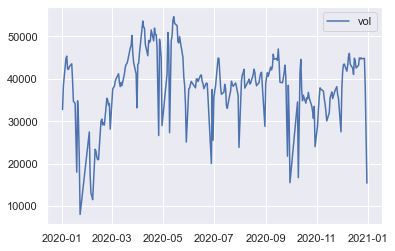

In [86]:
vol.plot()

<ipython-input-90-808281bfd471>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(vol.vol,freq=12)


<Figure size 432x288 with 0 Axes>

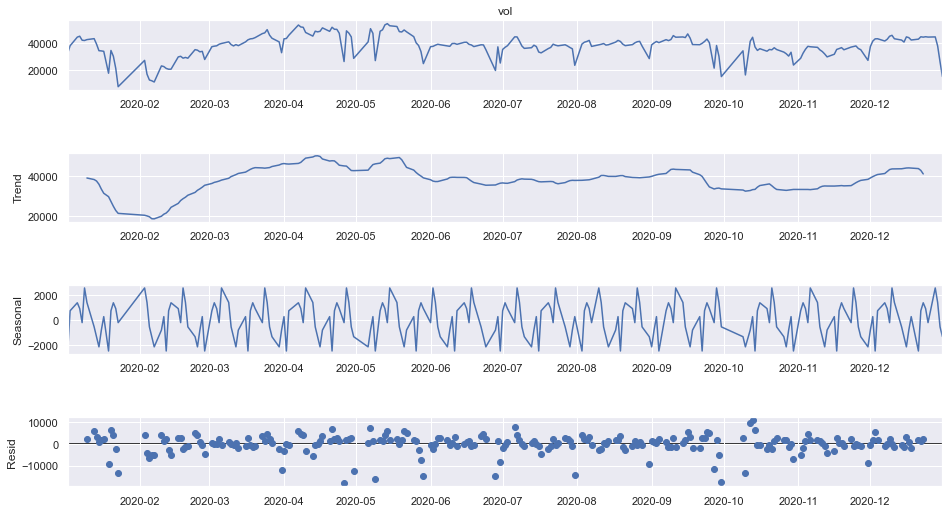

In [90]:
decomposition = seasonal_decompose(vol.vol,freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
#长期趋势
Trend = decomposition.trend
#季节性
Seasonal = decomposition.seasonal 
#残差
Residual = decomposition.resid

In [97]:
#长期趋势及残差项
Trend = decomposition.trend
Trend_values=Trend.values
Residual = decomposition.resid
Residual_values=Residual.values
hp_data = Trend_values+Residual_values

In [ ]:
# t = np.linalg.inv((np.eye(N)+10*D.T@D))@ Trend_values
cycle0, trend0 = sm.tsa.filters.hpfilter(hp_data, lamb=10)
trend0

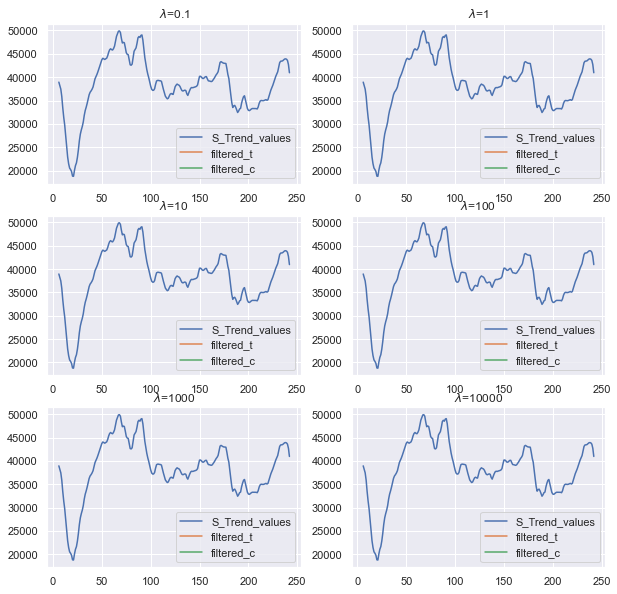

In [74]:
#HP滤波
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def hp(y, lamb=10):
    def D_matrix(N):
        #(N-1,N) 元素全为0
        D = np.zeros((N-1,N))
        #后(N-1,N-1)对角线元素置1
        D[:,1:] = np.eye(N-1)
        #前(N-1,N-1)对角线元素置-1
        D[:,:-1] -= np.eye(N-1)
        """D1
        [[-1.  1.  0. ...  0.  0.  0.]
         [ 0. -1.  1. ...  0.  0.  0.]
         [ 0.  0. -1. ...  0.  0.  0.]
         ...
         [ 0.  0.  0. ...  1.  0.  0.]
         [ 0.  0.  0. ... -1.  1.  0.]
         [ 0.  0.  0. ...  0. -1.  1.]]
        """
        return D

    N = len(Trend_values)
    D1 = D_matrix(N)
    D2 = D_matrix(N-1)
    #@是矩阵乘法  D2.shape = (N-2,N-1) D1.shape = (N-1,N) 所以 D.shape = (N-2,N) 
    D = D2 @ D1
    # G = [i+λF]*-1Y
    #np.linalg.inv为矩阵求逆 套用公式 D.T@D = F F.shape=(N,N)
    t = np.linalg.inv((np.eye(N)+lamb*D.T@D))@ Trend_values
    return t

plt.figure(figsize=(10,10))

#尝试不同的λ
for i,l in enumerate([0.1,1,10,100,1000, 10000]):
    plt.subplot(3,2,i+1)
    t = hp(Trend_values,l)
    c = Trend_values-t
#     plt.plot(vol_values,label='vol_values')
    plt.plot(Trend_values, label='S_Trend_values')
    plt.plot(t, label='filtered_t')
    plt.plot(c, label='filtered_c')
    plt.legend()
    plt.title('$\lambda$='+str(l))
plt.show()


In [51]:
# cycle, trend = sm.tsa.filters.hpfilter(vol, lamb=10)
trend = np.linalg.inv((np.eye(N)+10*D.T@D))@ vol_values
cycle=vol_values-trend
# vol

In [16]:
def D_matrix(N):
        #(N-1,N) 元素全为0
        D = np.zeros((N-1,N))
        #后(N-1,N-1)对角线元素置1
        D[:,1:] = np.eye(N-1)
        #前(N-1,N-1)对角线元素置-1
        D[:,:-1] -= np.eye(N-1)
        """D1
        [[-1.  1.  0. ...  0.  0.  0.]
         [ 0. -1.  1. ...  0.  0.  0.]
         [ 0.  0. -1. ...  0.  0.  0.]
         ...
         [ 0.  0.  0. ...  1.  0.  0.]
         [ 0.  0.  0. ... -1.  1.  0.]
         [ 0.  0.  0. ...  0. -1.  1.]]
        """
        return D

In [18]:
N = len(vol_values)
D1 = D_matrix(N)
D2 = D_matrix(N-1)
#@是矩阵乘法  D2.shape = (N-2,N-1) D1.shape = (N-1,N) 所以 D.shape = (N-2,N) 
D = D2 @ D1
g_10 = np.linalg.inv((np.eye(N)+10*D.T@D))@ vol_values

In [22]:
g01 = np.linalg.inv((np.eye(N)+0.1*D.T@D))@ vol_values
g01

array([32776.26830508, 38650.01982509, 44091.33829432, 44999.64541114,
       42857.41293066, 42285.43349655, 42908.61944585, 42927.01015006,
       39446.44252218, 35442.21997461, 34368.80469792, 31500.44913665,
       23027.28375612, 31724.25565515, 29954.19337142, 20761.17489106,
       12912.05348597, 22835.22151742, 18310.90548704, 13422.09772228,
       11939.51968012, 13302.8915948 , 21590.68689938, 22997.61807885,
       21674.11262442, 20834.9822388 , 22249.21138058, 28775.87612028,
       30391.26472268, 29452.75124971, 29365.32453645, 30087.09492094,
       34445.58137674, 35070.70366802, 34086.8247916 , 32997.43406413,
       30345.85488621, 36106.75701721, 38014.60135438, 38462.11762285,
       39337.41500388, 40129.31545029, 40735.90887602, 39308.54069217,
       38373.30654955, 38736.74917734, 38812.23680911, 40915.63290515,
       42549.74883453, 43292.86491493, 43608.02111867, 44585.06726875,
       46925.07000154, 48247.20526591, 49391.44099534, 46562.44946426,
      

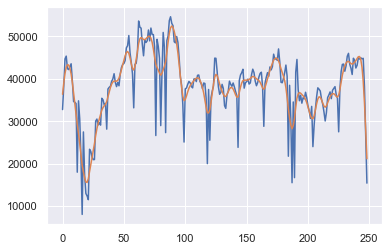

In [23]:
plt.plot(vol_values, label='original')
plt.plot(g_10, label='filtered')

In [73]:
col=vol.iloc[:,0]
#取表中的第1列的所有值
vol_values=col.values
# #输出结果
vol_values

array([32733.025 , 38283.2053, 44649.6433, 45313.4775, 42357.8249,
       42142.9462, 42799.1992, 43513.9568, 39494.3584, 34624.199 ,
       34460.3925, 34158.9308, 17986.0719, 34792.3806, 30526.4709,
       21527.3288,  8047.2369, 27465.4981, 17279.6784, 12988.9976,
       12403.395 , 11514.5155, 23386.2584, 22904.0565, 21529.5299,
       20943.9914, 20960.9326, 30013.9847, 30496.0262, 29108.0634,
       29652.2654, 29067.335 , 35395.0257, 35008.6163, 33790.8082,
       34140.5687, 28121.834 , 37572.5839, 37964.1393, 38222.1889,
       39378.3418, 39954.641 , 41173.3839, 39136.5854, 38133.9891,
       39126.9987, 38330.9316, 41123.1798, 42638.2248, 43355.5459,
       43569.1428, 44276.8782, 47247.1492, 47783.6757, 50167.6045,
       46080.9012, 43825.8418, 41123.5371, 33136.532 , 43368.7009,
       43621.817 , 46003.6848, 53581.9094, 52136.2955, 51901.4601,
       48078.7315, 45392.208 , 49006.3206, 48521.1846, 48930.8216,
       51469.4253, 48901.8718, 51922.9778, 50418.9585, 50386.2